# Exercise 1: Playing with dice (Central Limit Thm)
Consider the problem of throwing dice multiple times and numerically calculate the resulting probability distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Consistent figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)

## 1.1 Throwing one die
**Goal:** Calculate the mean $\mu$ and variance $\sigma^2$ for a single die. Simulate rolling the die $N_{iter}$ times and plot the probability distribution.
- Use a random number generator to simulate dice throwing and calculate the resulting probability distribution $p_i$ of obtaining each number $i$ from 1 to 6 using discrete normalization: $\sum_i p_i = 1$.
- The random variable of interest is $x = \text{rand}(6)$.
- Generate $N_{iter}$ random numbers and use them for the calculation of the probability distribution of finding $x = (1, \dots, 6)$. 
- Plot the resulting probability distribution function $p_i$ (with $i= 1, \dots, 6$) and compare it with uniform distibution prediction. 

The mean value and variance are given respectively by the following formulas:
$$
\mu = \langle x \rangle = \frac{1}{6} \sum_{i=1}^{6} x_i,
$$
and
$$
\sigma^2 = \langle x^2 \rangle - \langle x \rangle^2,
$$
where:
$$
\langle x^2 \rangle = \frac{1}{6} \sum_{i=1}^{6} x_i^2.
$$

Theoretical Mean value (mu) is 3.5
Theoretical Variance (sigma^2) is 2.916666666666666
Simulated Mean value (mu) is 3.50459
Simulated Variance (sigma^2) is 2.9121789319


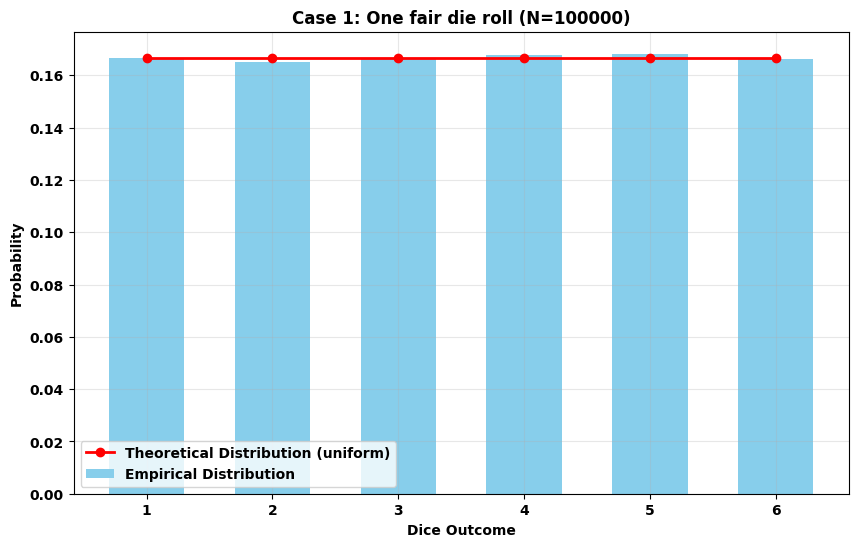

In [6]:
# --- THEORETICAL CALCULATIONS ---
xi = np.arange(1,7) # possible outcomes of a dice roll: 1, 2, 3, 4, 5, 6
xi_2 = xi**2

# Mean
mu = np.sum(xi) / len(xi)
# Variance
sig_2 = np.sum(xi_2) / len(xi_2) - mu**2

print(f"Theoretical Mean value (mu) is {mu}")
print(f"Theoretical Variance (sigma^2) is {sig_2}")

# --- PARAMETERS ---
N_iter = 100000 # number of throws
sides = 6 # number of sides on the die


# --- SIMULATION 1: One fair die roll ---
# Empirical PDF
rolls = np.random.randint(1, sides + 1, size=N_iter)
mu_sim = np.mean(rolls)
sig2_sim = np.var(rolls)
print(f"Simulated Mean value (mu) is {mu_sim}")
print(f"Simulated Variance (sigma^2) is {sig2_sim}")

values, counts = np.unique(rolls, return_counts=True)
p1 = counts / N_iter # probability distribution

# Theoretical PDF (uniform distribution)
p1_theory = np.ones(len(xi)) / len(xi)

# Plotting
plt.bar(values, p1, width=0.6, color='skyblue', label='Empirical Distribution')
plt.plot(xi, p1_theory, 'ro-', lw=2, label='Theoretical Distribution (uniform)')

plt.xlabel('Dice Outcome')
plt.ylabel('Probability')
plt.title(f'Case 1: One fair die roll (N={N_iter})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## 1.2 Throwing two dice

**Goal:** Simulate throwing two dice and calculating their average:
$$x = \frac{\text{rand}(6) + \text{rand}(6)}{2}.$$

Plot the probability distribution of this average.

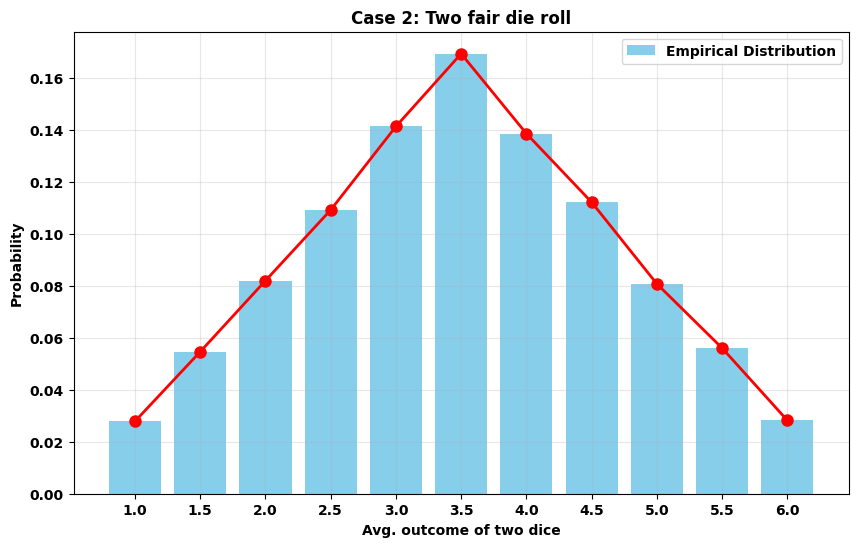

In [7]:
xi_avg = np.arange(1, 6.5, 0.5) 
xi_avg_2 = xi_avg**2

# --- SIMULATION 2: Two fair die rolls and average ---
rolls2 = np.random.randint(1, sides + 1, size=(N_iter, 2)) # two sets of rolls for the two dice. Resulting matrix has N rows (experiments) and 2 columns (dice)
avgs = np.mean(rolls2, axis=1) # average of the two dice for each experiment (axis=1 means row-wise operation)
values_avg, counts_avg = np.unique(avgs, return_counts=True) # we can use unique since the averages are still discrete
p2 = counts_avg / N_iter

# Plotting
plt.bar(values_avg, p2, width=0.4, color='skyblue', label='Empirical Distribution')
plt.plot(xi_avg, p2, 'ro-', lw=2, markersize=8)
plt.xlabel('Avg. outcome of two dice')
plt.ylabel('Probability')
plt.title('Case 2: Two fair die roll')
plt.xticks(xi_avg)
plt.legend()
plt.grid(True, alpha=0.3)



## 1.3 Throwing multiple dice

**Goal:** Throw $N_{dice}$ dice and calculate their average:
$$x = \frac{\sum^{N_{dice}}_{i=1} \text{rand}(6)}{N_{dice}}.$$

Compare the result with the Central Limit Theorem (CLT) prediction. According to CLT, the distribution of averages should approach a Gaussian (Normal) distribution with:
* Mean: $\mu = 3.5$
* Width (std dev): $\sigma' = \frac{\sigma}{\sqrt{N_{dice}}}$


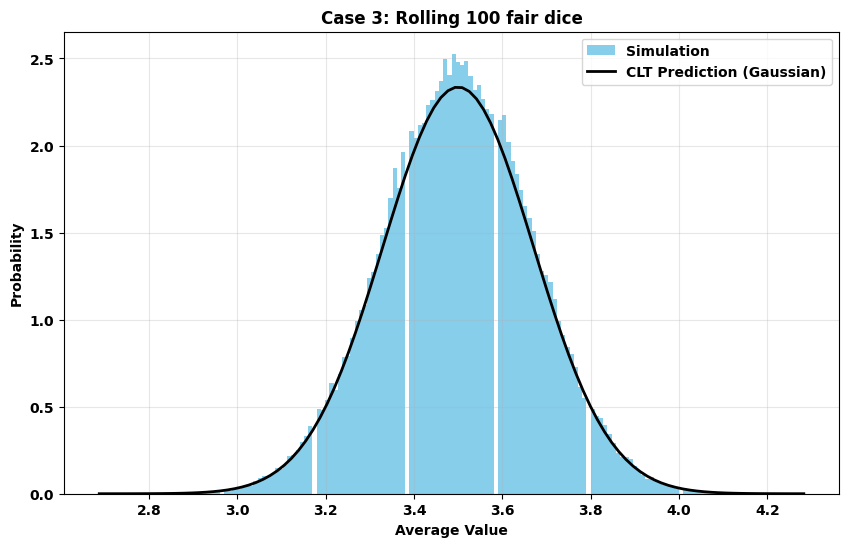

In [9]:
# --- PARAMETERS ---
N_dice = 100 # number of diced rolled simultaneously
N_iter = 100000 # number of experiments/rolls

# --- SIMULATION 3: Rolling N_dice fair dice and averaging ---
rolls_matrix = np.random.randint(1, sides + 1, size=(N_iter, N_dice))
avgs_N = np.mean(rolls_matrix, axis=1) # average of the 100 dice for each experiment


# Plotting
# note that for large N_dice, the distribution of averages becomes approximately continuous, so we use a histogram
plt.hist(avgs_N, bins='auto', density=True, color='skyblue', label='Simulation')

# Theoretical PDF (Gaussian distribution)
sigma_CLT = np.sqrt(sig_2)/np.sqrt(N_dice)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma_CLT)
plt.plot(x, p, 'k', linewidth=2, label="CLT Prediction (Gaussian)")

plt.xlabel("Average Value")
plt.ylabel("Probability")
plt.title(f"Case 3: Rolling {N_dice} fair dice")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 1.4 Error Estimation and Convergence
**Goal:** Analyze how the error in estimating the mean decreases as we increase the number of throws $N$.

We define two types of errors:
1. **Actual Error:** The absolute difference between our simulated mean and the true mean ($3.5$).
   $$\epsilon_{actual} = |\mu_{sim} - \mu_{theory}|$$
2. **Statistical Error:** The theoretical standard deviation of the mean expected from CLT.
   $$\epsilon_{stat} = \frac{\sigma}{\sqrt{N}}$$

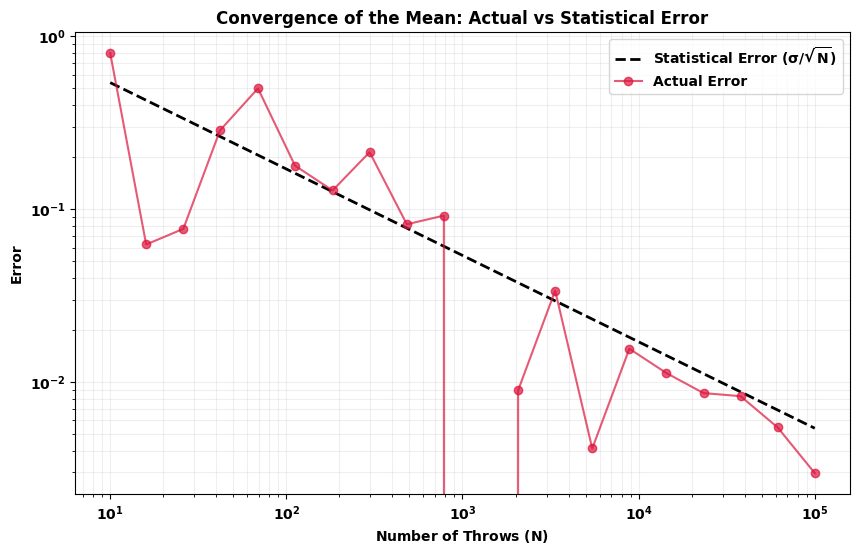

In [11]:
# --- PARAMETERS ---
N_values = np.geomspace(10, 100000, num=20, dtype=int) # log range of N values

actual_errors = []
stat_errors = []

true_mean = mu
true_sig2 = sig_2

for N in N_values:
    current_rolls = np.random.randint(1, sides+1, size=N)
    current_mean = np.mean(current_rolls)

    error_actual = np.abs(current_mean - true_mean)
    actual_errors.append(error_actual)

    stat_error = np.sqrt(true_sig2 / N)
    stat_errors.append(stat_error)

    
# --- PLOTTING THE ERRORS ---
plt.figure()

# Plot Statistical Error (The theoretical bound)
plt.plot(N_values, stat_errors, 'k--', linewidth=2, label=r'Statistical Error ($\sigma/\sqrt{N}$)')

# Plot Actual Error (The random results)
plt.plot(N_values, actual_errors, 'o-', color='crimson', alpha=0.7, label='Actual Error')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Throws ($N$)')
plt.ylabel('Error')
plt.title('Convergence of the Mean: Actual vs Statistical Error')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)


As expected, the error decreases following a power law $N^{-1/2}$, which, on a log-log plot, appears as a straight line with slope $-0.5$.